In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv('height-weight.csv')

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

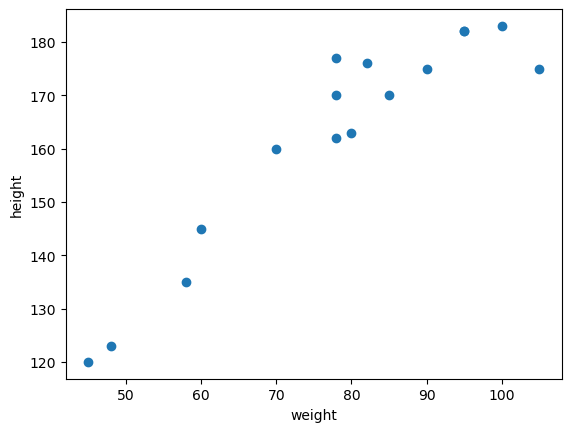

In [9]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")

In [10]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.934236
Height,0.934236,1.000000


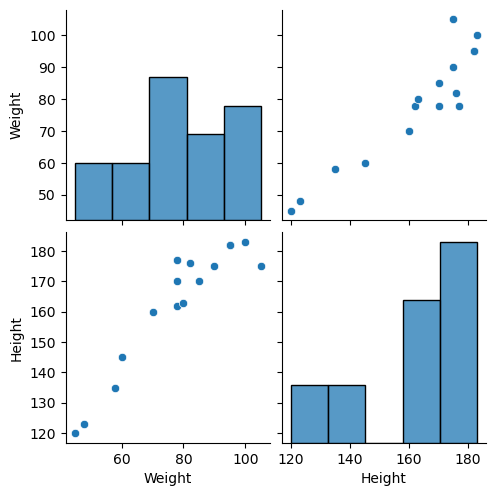

In [11]:
## Seaborn for visualization

import seaborn as sns
sns.pairplot(df)

In [12]:
## Independent and dependent features
X = df[['Weight']] ## independent feature should be dataframe or 2d array (means 2 square brackets)
y = df['Height'] ##this variable can be series form or in 1d array
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [13]:
X_series= df[['Weight']] ## independent feature should be dataframe or 2d array (means 2 square brackets)
np.array(X_series).shape

(16, 1)

In [14]:
np.array(y).shape

(16,)

In [15]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [16]:
X_train.shape

(12, 1)

In [17]:
##standardisation

from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Difference between fit transform and transform

for training data, we're supposed to use fit transform as the mean zero and standard deviation will be one and the z-score is calculated, and transform is calculated for test data, as the same mean and standard deviation will be applied for test data. No new mean and sd are calculated for test data and we don't want to data leakage

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.08119266],
       [ 1.18541279],
       [ 1.83495404],
       [-1.86743111]])

In [22]:
## Apply Simple linear Regression

from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(X_train,y_train)

LinearRegression()

In [25]:
print("coefficient or slope:",regression.coef_)

coefficient or slope: [17.99770559]


In [26]:
print("Intercept:",regression.intercept_)

Intercept: 162.33333333333334


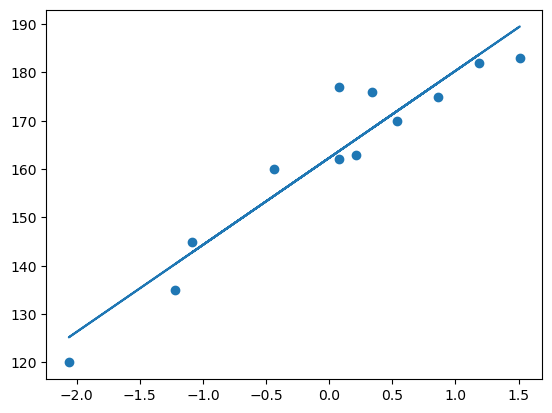

In [27]:
## Plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

## Prediction of test data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_test = 159.0 + 19.75(X_test)

In [29]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [30]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

122.12798521612503
8.488895725293723
11.051153117033762


## R square

Formula
R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [62]:
from sklearn.metrics import r2_score

In [64]:
score = r2_score(y_test,y_pred)

In [66]:
score

0.7731017459988387

Adjusted R^2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [69]:
## Display adjusted R-Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6596526189982581

In [75]:
## OLS Linear Regression
import statsmodels.api as sm

In [77]:
model = sm.OLS(y_train, X_train).fit()

In [79]:
prediction = model.predict(X_test)
print(prediction)

[  1.46128153  21.33471038  33.02496264 -33.60947526]


In [81]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.078
Method:                 Least Squares   F-statistic:                             0.1350
Date:                Sun, 11 Aug 2024   Prob (F-statistic):                       0.720
Time:                        00:16:22   Log-Likelihood:                         -78.111
No. Observations:                  12   AIC:                                      158.2
Df Residuals:                      11   BIC:                                      158.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\sivaj\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [89]:
## predictions for new data
regression.predict(scaler.transform([[72]])) ## scaling transformation has to be done, and it has to be a 2d array

C:\Users\sivaj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.78046351])